In [24]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os

In [25]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANELLS = 3
EPOCHS = 20
CLASS_NUM = 4

In [27]:
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=15
)

train_set = train_data_gen.flow_from_directory(
    '../set/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse'
)

Found 5617 images belonging to 4 classes.


In [46]:
class_names = list(train_set.class_indices.keys())
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [28]:
val_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=15
)

val_set = val_data_gen.flow_from_directory(
    '../set/val',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse'
)

Found 701 images belonging to 4 classes.


In [29]:
test_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=15
)

test_set = test_data_gen.flow_from_directory(
    '../set/test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse'
)

Found 705 images belonging to 4 classes.


In [30]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANELLS)
n_classes = len(class_names)

model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=input_shape),
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape = input_shape)

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 64)      

In [32]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [33]:
history = model.fit(
    train_set,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_set,
    steps_per_epoch=175,
    validation_steps=21
)

model_version = max([int(i) for i in os.listdir("saved_models") + [0]])+1
model.save(f"saved_models/{model_version}.h5")

Epoch 1/20
175/175 [==============================] - 351s 2s/step - loss: 0.9300 - accuracy: 0.5966 - val_loss: 0.6763 - val_accuracy: 0.7217
Epoch 2/20
175/175 [==============================] - 270s 2s/step - loss: 0.6235 - accuracy: 0.7517 - val_loss: 0.5784 - val_accuracy: 0.7708
Epoch 3/20
175/175 [==============================] - 277s 2s/step - loss: 0.5375 - accuracy: 0.7878 - val_loss: 0.4757 - val_accuracy: 0.8185
Epoch 4/20
175/175 [==============================] - 272s 2s/step - loss: 0.4655 - accuracy: 0.8209 - val_loss: 0.4110 - val_accuracy: 0.8542
Epoch 5/20
175/175 [==============================] - 276s 2s/step - loss: 0.4049 - accuracy: 0.8435 - val_loss: 0.3735 - val_accuracy: 0.8601
Epoch 6/20
175/175 [==============================] - 266s 2s/step - loss: 0.3407 - accuracy: 0.8763 - val_loss: 0.3841 - val_accuracy: 0.8601
Epoch 7/20
175/175 [==============================] - 268s 2s/step - loss: 0.3239 - accuracy: 0.8806 - val_loss: 0.3770 - val_accuracy: 0.8735

In [34]:
scores = model.evaluate(test_set)
scores

23/23 [==============================] - 23s 1s/step - loss: 0.1609 - accuracy: 0.9475


[0.16090519726276398, 0.9475177526473999]

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

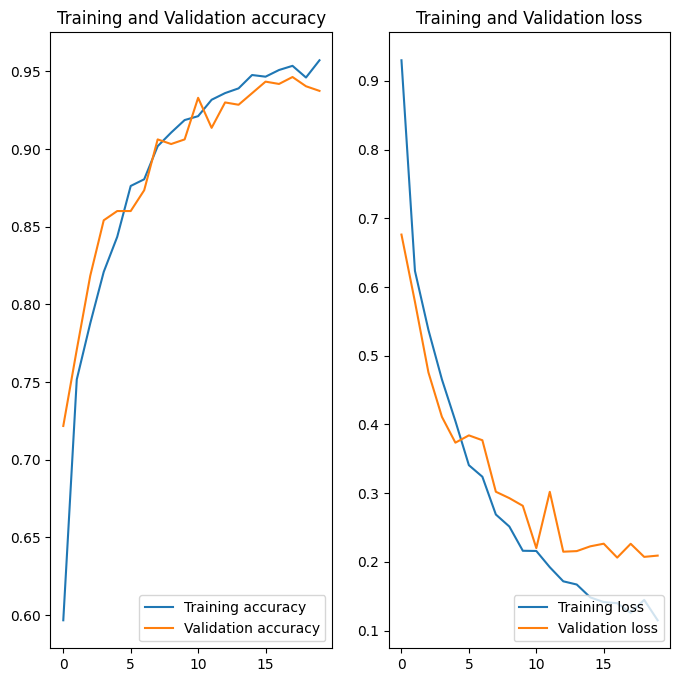

In [36]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training loss')
plt.plot(range(EPOCHS), val_loss, label='Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')

Image to predict:
Actual label: pituitary
1/1 [==============================] - 0s 294ms/step
Predicted label: pituitary


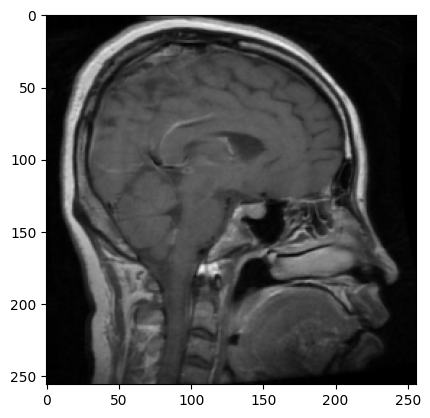

In [39]:

for images_batch, label_batch in test_set:
    first_image = images_batch[0]
    first_label = int(label_batch[0])
    
    print("Image to predict:")
    plt.imshow(first_image)
    print(f"Actual label: {class_names[first_label]}")
    
    prediction = model.predict(images_batch)
    print(f"Predicted label: {class_names[np.argmax(prediction[0])]}")
    break
    

In [40]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax([predictions[0]])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 44ms/step


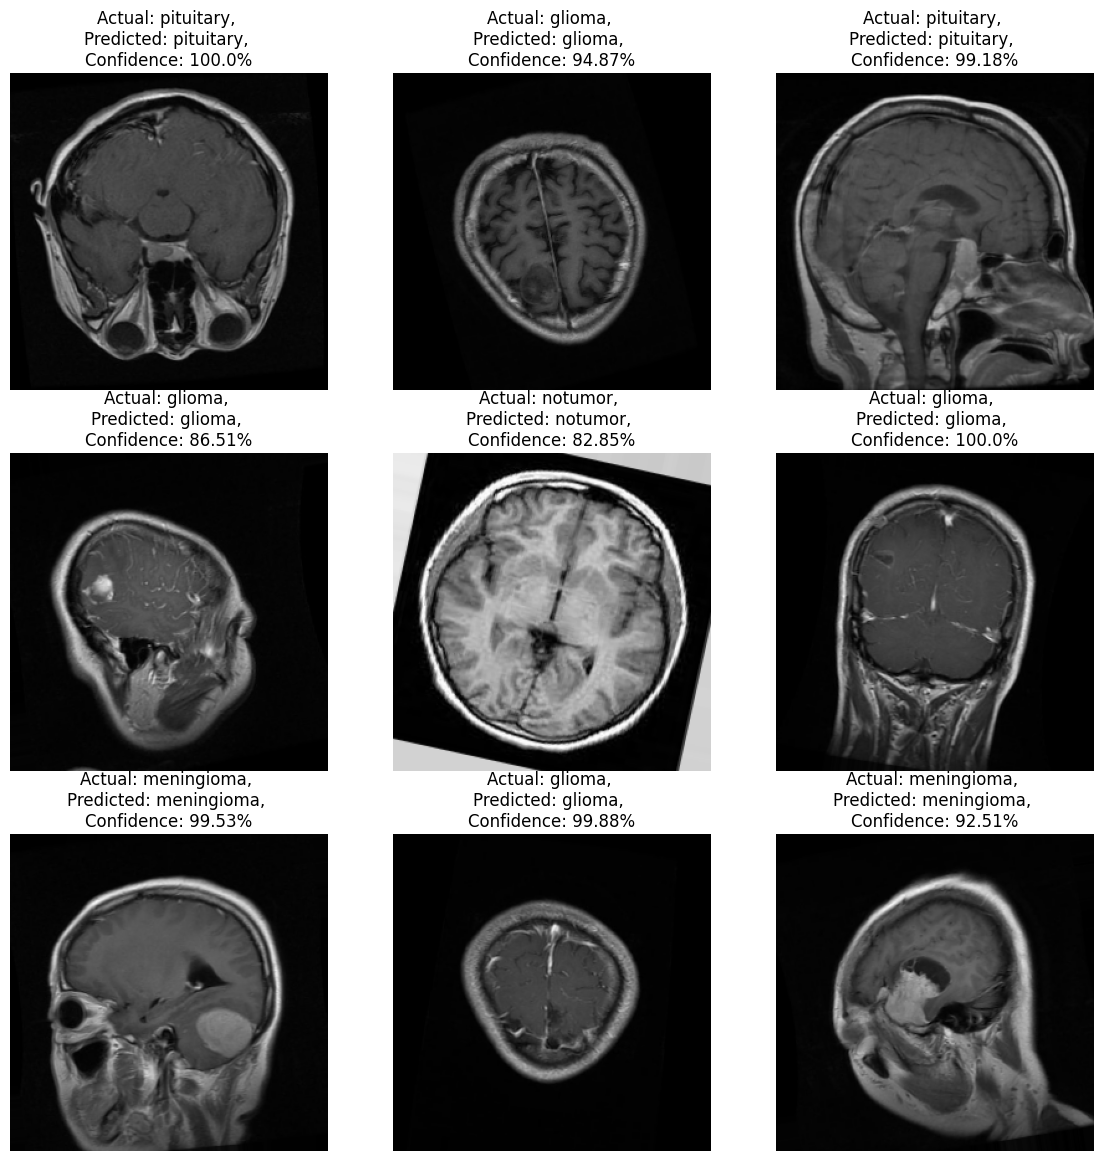

In [45]:
plt.figure(figsize=(14, 14))

for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]
        
        plt.title(f"Actual: {actual_class}, \nPredicted: {predicted_class}, \nConfidence: {confidence}%")
        
        plt.axis('off')
    break